# Sentinel-3 <img align="right" src="../Supplementary_data/DE_Africa_Logo_Stacked_RGB_small.jpg">


* **Products used:** 
[s3_olci_l2_lfr](https://explorer.digitalearth.africa/products/s3_olci_l2_lfr)

## Background



## Description



***

## Getting started

To run this analysis, run all the cells in the notebook, starting with the "Load packages" cell.

In [1]:
%matplotlib inline
import datacube
from deafrica_tools.plotting import display_map

In [2]:
dc = datacube.Datacube(app="Sentinel_3")

In [3]:
dc.list_products().loc[dc.list_products()['description'].str.contains('Sentinel-3')]

,name,description,license,default_crs,default_resolution
name,,,,,
s3_ol_2_wfr_nrt,s3_ol_2_wfr_nrt,Sentinel-3 Level 2 Water Full Resolution (WFR)...,CC-BY-4.0,EPSG:4326,"(-0.003, 0.003)"
s3_olci_l2_lfr,s3_olci_l2_lfr,Sentinel-3 OLCI L2 LAND,CC-BY-4.0,EPSG:4326,"(-0.003, 0.003)"
s3_olci_l2_wfr,s3_olci_l2_wfr,Sentinel-3 OLCI L2 WATER,CC-BY-4.0,EPSG:4326,"(-0.003, 0.003)"
s3_syn_2_vg1,s3_syn_2_vg1,Sentinel-3 Level-2 VG1 SYN product,CC-BY-4.0,EPSG:4326,"(-0.003, 0.003)"


In [4]:
product = "s3_olci_l2_wfr"

### List measurements

We can further inspect the data available for each SAR product using datacube's `list_measurements` functionality. The table below lists each of the measurements available in the data.

In [5]:
measurements = dc.list_measurements()
measurements.loc[product]

,name,dtype,units,nodata,aliases,flags_definition,add_offset,scale_factor
measurement,,,,,,,,
A865,A865,int16,1,32767,[aerosol_angstrom_exponent],NaN,0.0,0.00010
ADG443_NN,ADG443_NN,int16,log10(1/m),32767,[CDM_absorbtion_coefficient],NaN,0.0,0.00010
B01,B01,uint16,1,32767,[Oa01_reflectance],NaN,0.0,0.00010
B02,B02,uint16,1,65535,[Oa02_reflectance],NaN,0.0,0.00010
B03,B03,uint16,1,65535,[Oa03_reflectance],NaN,0.0,0.00001
B04,B04,uint16,1,65535,[Oa04_reflectance],NaN,0.0,0.00010
B05,B05,uint16,1,65535,[Oa05_reflectance],NaN,0.0,0.00010
B06,B06,uint16,1,65535,[Oa06_reflectance],NaN,0.0,0.00010
B07,B07,uint16,1,65535,[Oa07_reflectance],NaN,0.0,0.00010


In [6]:
latitude = -33.92
longitude = 18.42
buffer = 0.1
time = ('2025-05')

In [7]:
display_map(x=(longitude-buffer, longitude+buffer), y=(latitude+buffer, latitude-buffer))

In [8]:
query = {
    'x': (longitude-buffer, longitude+buffer),
    'y': (latitude+buffer, latitude-buffer),
    'time':time,
    'output_crs': 'EPSG:4326',
    'resolution': (0.003, 0.003)}

In [9]:
ds_S3 = dc.load(product=product,
                group_by="solar_day",
                **query)

ds_S3

<xarray.Dataset> Size: 3MB
Dimensions:      (time: 14, latitude: 67, longitude: 68)
Coordinates:
  * time         (time) datetime64[ns] 112B 2025-05-01T04:16:33 ... 2025-05-1...
  * latitude     (latitude) float64 536B -34.02 -34.02 -34.01 ... -33.82 -33.82
  * longitude    (longitude) float64 544B 18.32 18.32 18.33 ... 18.52 18.52
    spatial_ref  int32 4B 4326
Data variables: (12/26)
    A865         (time, latitude, longitude) int16 128kB 0 0 0 0 0 ... 0 0 0 0 0
    ADG443_NN    (time, latitude, longitude) int16 128kB 0 0 0 0 0 ... 0 0 0 0 0
    B01          (time, latitude, longitude) uint16 128kB 0 0 0 0 0 ... 0 0 0 0
    B02          (time, latitude, longitude) uint16 128kB 0 0 0 0 0 ... 0 0 0 0
    B03          (time, latitude, longitude) uint16 128kB 0 0 0 0 0 ... 0 0 0 0
    B04          (time, latitude, longitude) uint16 128kB 0 0 0 0 0 ... 0 0 0 0
    ...           ...
    IWV_W        (time, latitude, longitude) uint8 64kB 0 0 0 0 ... 14 14 14 13
    KD490_M07    (time, latitude, longitude) int16 128kB 0 0 0 0 0 ... 0 0 0 0 0
    PAR          (time, latitude, longitude) uint16 128kB 0 0 0 0 0 ... 0 0 0 0
    T865         (time, latitude, longitude) int16 128kB 0 0 0 0 0 ... 0 0 0 0 0
    TSM_NN       (time, latitude, longitude) int16 128kB 0 0 0 0 0 ... 0 0 0 0 0
    dataMask     (time, latitude, longitude) uint8 64kB 0 0 0 0 0 ... 0 0 0 0 0
Attributes:
    crs:           EPSG:4326
    grid_mapping:  spatial_ref

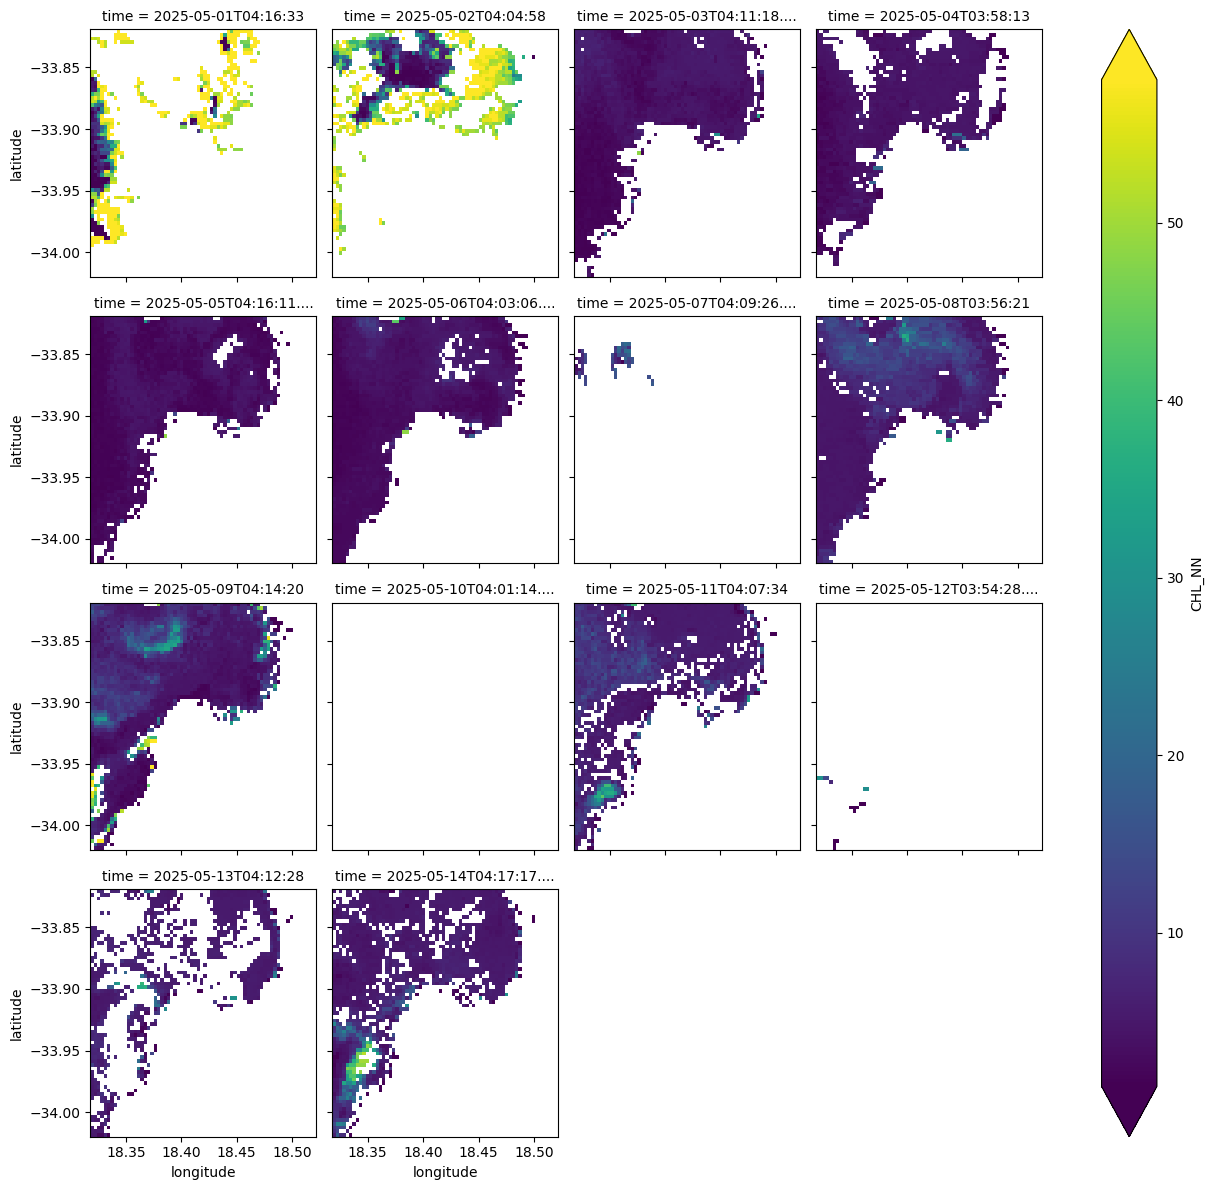

In [10]:
(10**(ds_S3['CHL_NN']*0.0001)).where(ds_S3.dataMask==1).plot(robust=True, col="time", col_wrap=4);

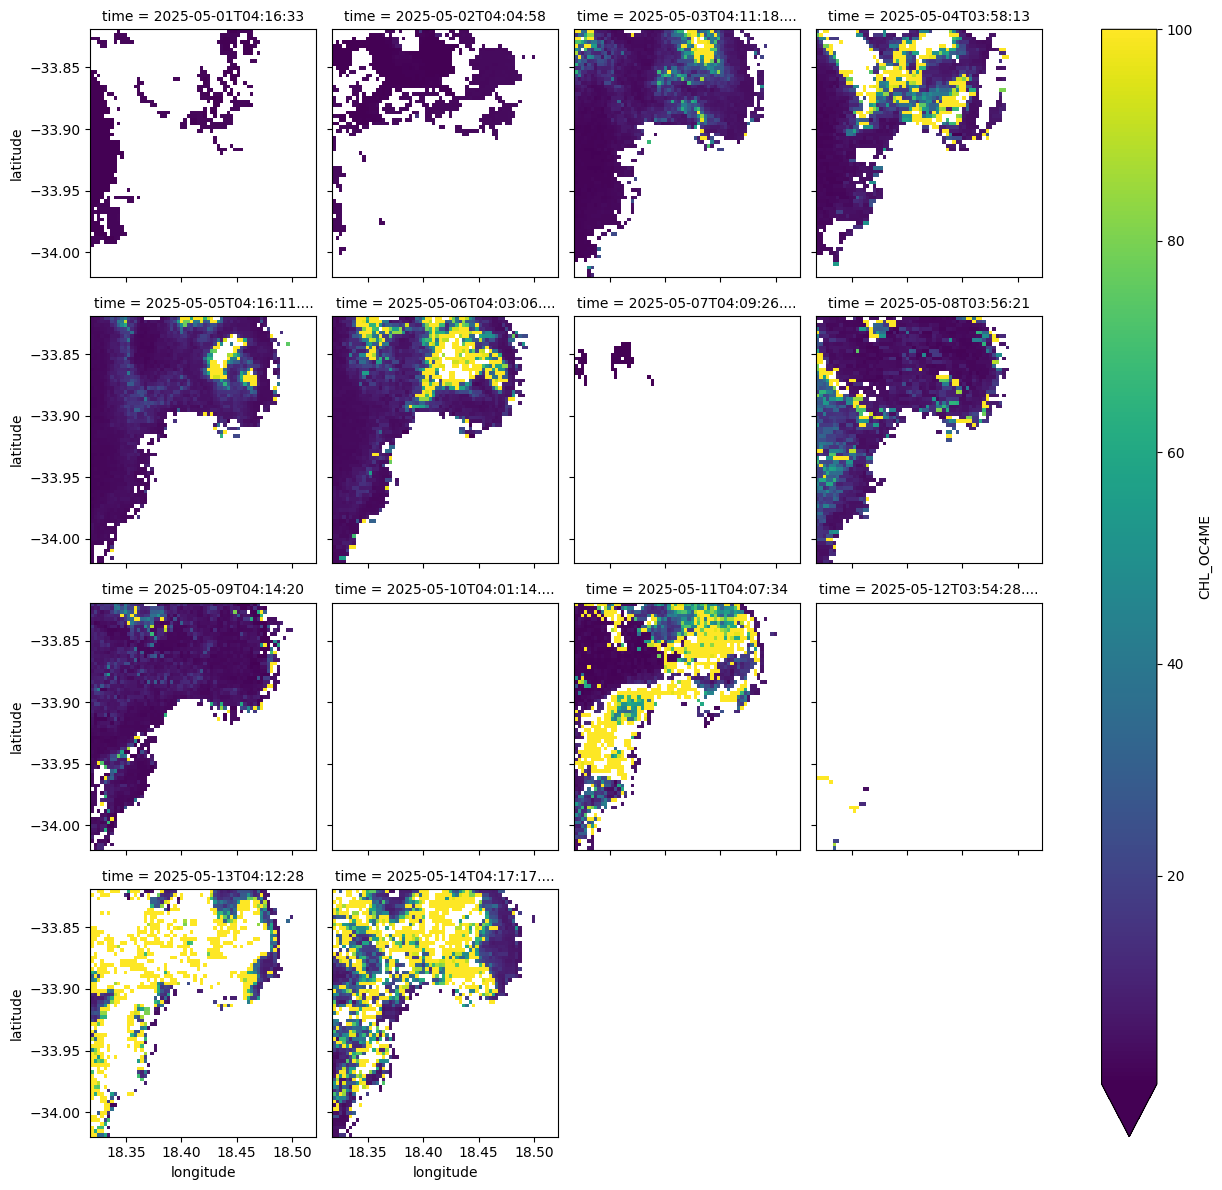

In [11]:
(10**(ds_S3['CHL_OC4ME']*0.0001)).where(ds_S3.dataMask==1).plot(robust=True, col="time", col_wrap=4);

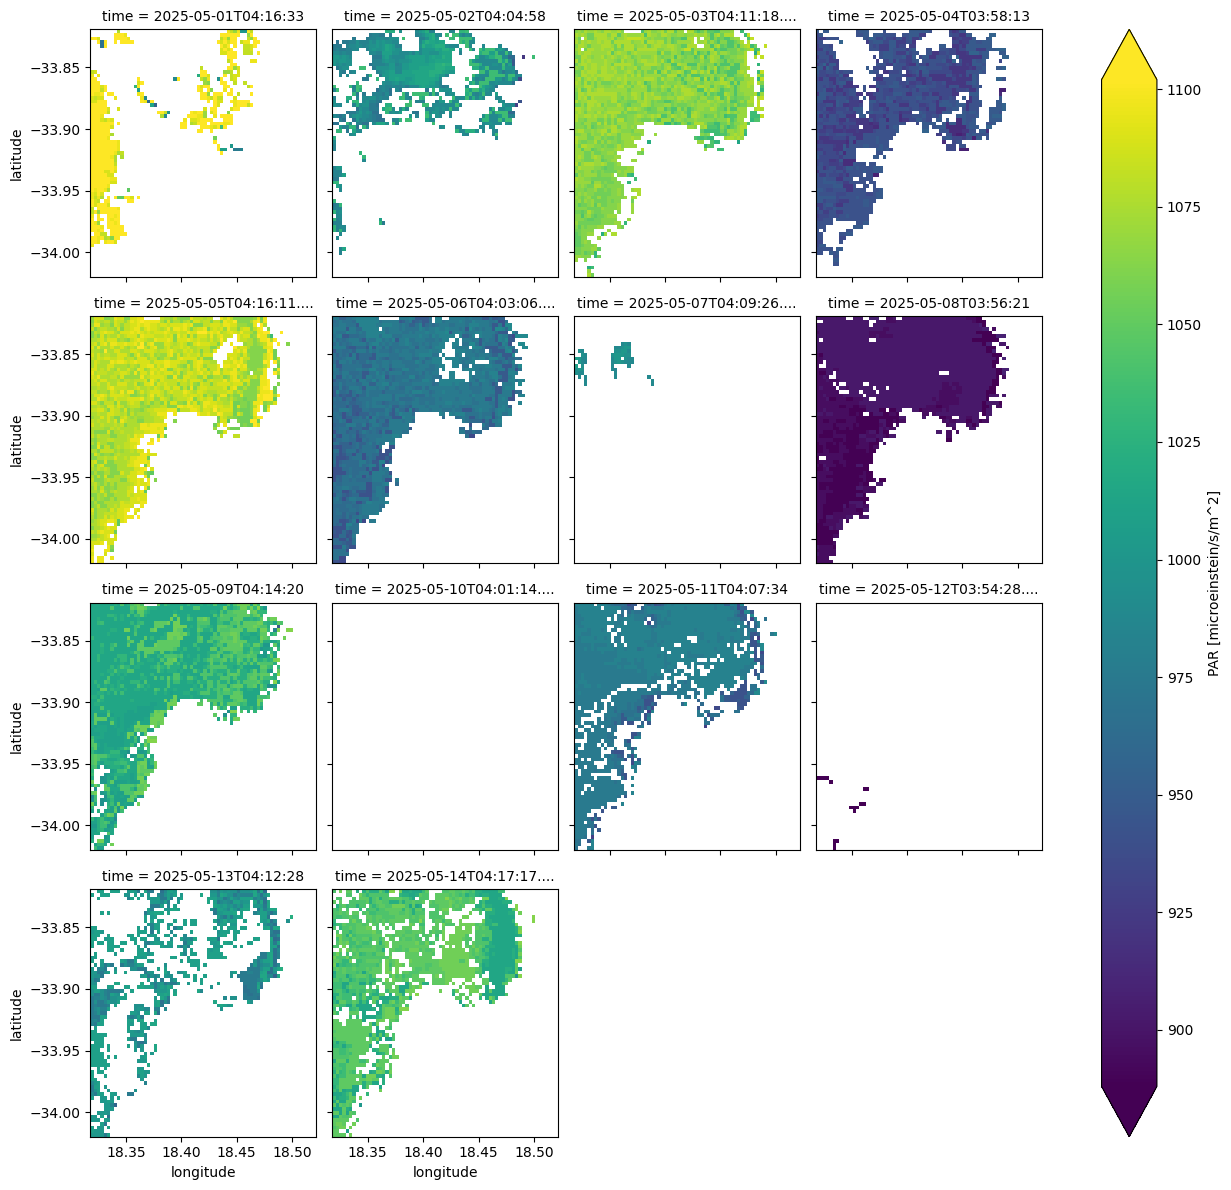

In [12]:
ds_S3['PAR'].where(ds_S3.dataMask==1).plot(robust=True, col="time", col_wrap=4);

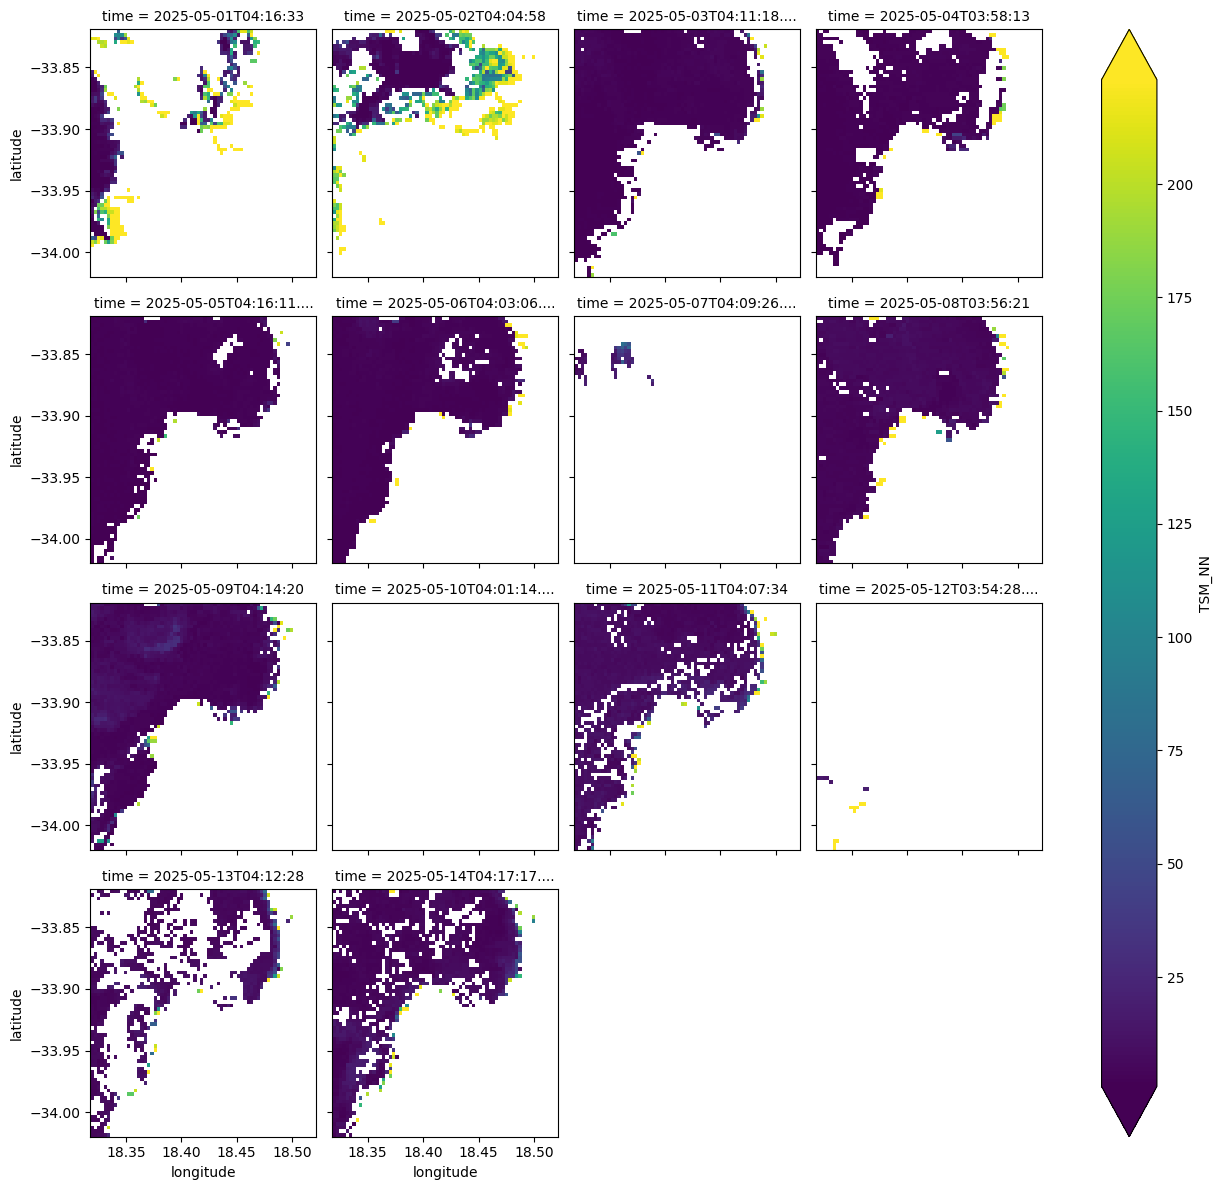

In [13]:
(10**(ds_S3['TSM_NN']*0.0001)).where(ds_S3.dataMask==1).plot(robust=True, col="time", col_wrap=4);